In [1]:
# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.dates as mdates

# read in the data, parse the dates, and set the index
tau_m = pd.read_csv('../shear_stress/mobile_shear_stress_2023.csv', parse_dates=['time'], index_col='time')
# separate by season
spring = tau_m['2023-03-01':'2023-06-21'].copy()
summer = tau_m['2023-06-22':'2023-09-21'].copy()
# make index a datetime objectc
spring.index = pd.to_datetime(spring.index)
summer.index = pd.to_datetime(summer.index)
# rename the column to tau_m
tau_m.columns = ['tau_m']
spring.columns = ['tau_m']
summer.columns = ['tau_m']

### Calculate $\tau$ / $\tau_c$

#### Wilcock and Kenworthy (2002)

Dg/Ds = 43.4

In [2]:
# create copies of the slices 
spring = tau_m[(tau_m.index >= '2023-03-01') & (tau_m.index <= '2023-06-21')].copy()
summer = tau_m[(tau_m.index >= '2023-06-21') & (tau_m.index <= '2023-09-21')].copy()

# spring tau*/tauc* by sizes - these values are from the Wilcock and Kenworthy (2002) equation excel sheet
spring.loc[:, '2'] = spring['tau_m'] / 28.073
spring.loc[:, '1.5'] = spring['tau_m'] / 21.055
spring.loc[:, '1'] = spring['tau_m'] / 14.036
spring.loc[:, '0.75'] = spring['tau_m'] / 10.527
spring.loc[:, '0.5'] = spring['tau_m'] / 7.018 

# summer tau/tauc by sizes
summer.loc[:, '2'] = summer['tau_m'] / 28.073
summer.loc[:, '1.5'] = summer['tau_m'] / 21.055
summer.loc[:, '1'] = summer['tau_m'] / 14.036
summer.loc[:, '0.75'] = summer['tau_m'] / 10.527
summer.loc[:, '0.5'] = summer['tau_m'] / 7.018

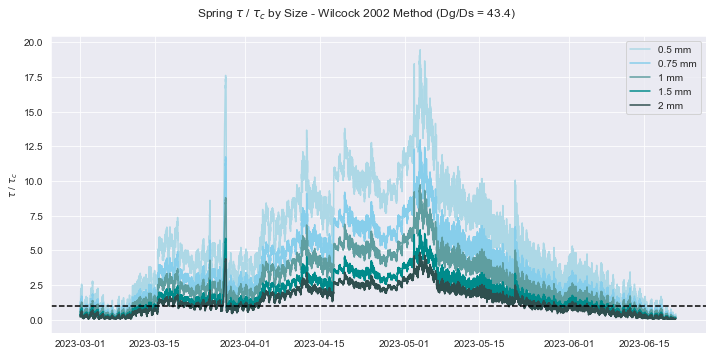

In [3]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(spring['0.5'], color='lightblue', label='0.5 mm')
plt.plot(spring['0.75'], color='skyblue', label='0.75 mm')
plt.plot(spring['1'], color='cadetblue', label='1 mm')
plt.plot(spring['1.5'], color='darkcyan', label='1.5 mm')
plt.plot(spring['2'], color='darkslategray', label='2 mm')

plt.axhline(y=1, color='k', linestyle='--')

plt.ylabel(r'$\tau$ / $\tau_c$')
plt.xlabel('')
plt.legend()
plt.suptitle(r'Spring $\tau$ / $\tau_c$ by Size - Wilcock 2002 Method (Dg/Ds = 43.4)')
plt.tight_layout()
plt.show()

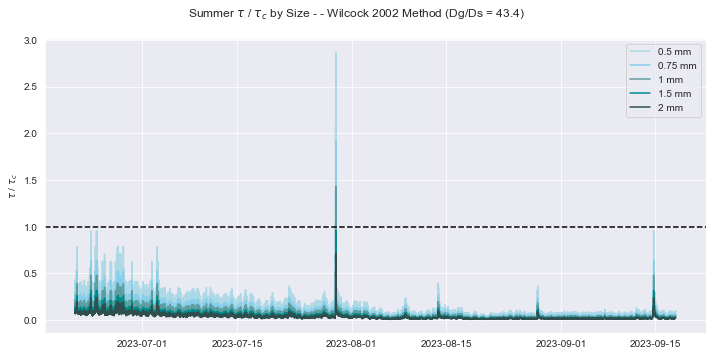

In [4]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(summer['0.5'], color='lightblue', label='0.5 mm')
plt.plot(summer['0.75'], color='skyblue', label='0.75 mm')
plt.plot(summer['1'], color='cadetblue', label='1 mm')
plt.plot(summer['1.5'], color='darkcyan', label='1.5 mm')
plt.plot(summer['2'], color='darkslategray', label='2 mm')

plt.axhline(y=1, color='k', linestyle='--')

plt.ylabel(r'$\tau$ / $\tau_c$')
plt.xlabel('')
plt.legend()
plt.suptitle(r'Summer $\tau$ / $\tau_c$ by Size - - Wilcock 2002 Method (Dg/Ds = 43.4)')
plt.tight_layout()
plt.show()

### Calculate 	Dimensionless $\tau$* / $\tau_c$*

#### Wilcock and Kenworthy (2002)

Dg/Ds = 43.4

In [5]:
# convert to dimensionless values
d50 = 0.8 # mm
tau_m['tau_m*'] = tau_m['tau_m'] / ((2650-1000)*9.81*d50/1000)

# create copies of the slices 
spring = tau_m[(tau_m.index >= '2023-03-01') & (tau_m.index <= '2023-06-21')].copy()
summer = tau_m[(tau_m.index >= '2023-06-21') & (tau_m.index <= '2023-09-21')].copy()

tau_ri = 0.867

# spring tau*/tauc* by sizes
spring.loc[:, 'sand'] = spring['tau_m*'] / tau_ri

# summer tau/tauc by sizes
summer.loc[:, 'sand'] = summer['tau_m*'] / tau_ri

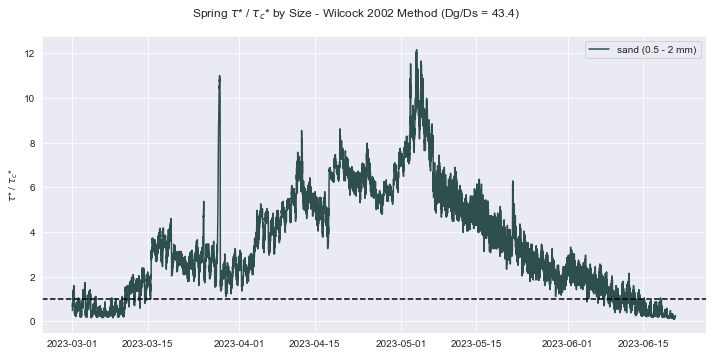

In [6]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(spring['sand'], color='darkslategray', label='sand (0.5 - 2 mm)')

plt.axhline(y=1, color='k', linestyle='--')

plt.ylabel(r'$\tau$* / $\tau_c$*')
plt.xlabel('')
plt.legend()
plt.suptitle(r'Spring $\tau$* / $\tau_c$* by Size - Wilcock 2002 Method (Dg/Ds = 43.4)')
plt.tight_layout()
plt.show()

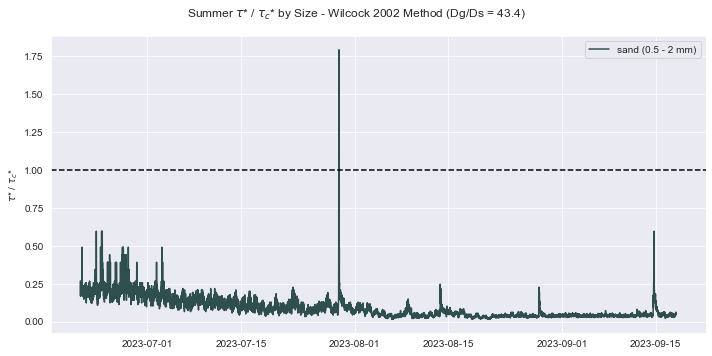

In [7]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(summer['sand'], color='darkslategray', label='sand (0.5 - 2 mm)')

plt.axhline(y=1, color='k', linestyle='--')

plt.ylabel(r'$\tau$* / $\tau_c$*')
plt.xlabel('')
plt.legend()
plt.suptitle(r'Summer $\tau$* / $\tau_c$* by Size - Wilcock 2002 Method (Dg/Ds = 43.4)')
plt.tight_layout()
plt.show()

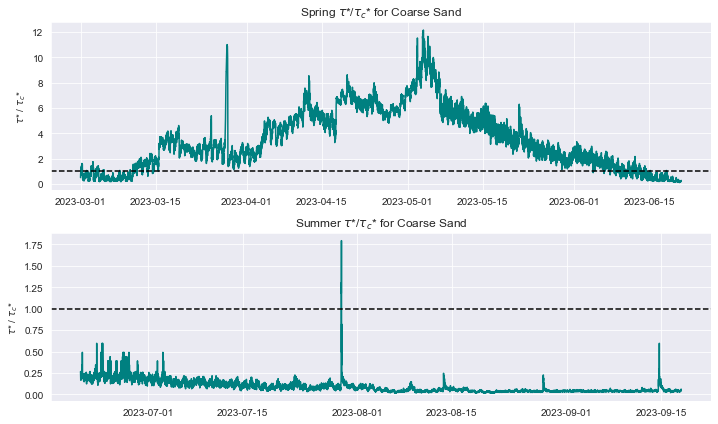

In [8]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
# plot for spring
top = axes[0]
top.plot(spring['sand'], color='teal', label='sand (0.5 - 2 mm)')
top.axhline(y=1, color='k', linestyle='--')
top.set_ylabel(r'$\tau$* / $\tau_c$*')
top.set_title(r'Spring $\tau$*/$\tau_c$* for Coarse Sand')

# plot for summer
bottom = axes[1]
bottom.plot(summer['sand'], color='teal', label='sand (0.5 - 2 mm)')
bottom.axhline(y=1, color='k', linestyle='--')
bottom.set_ylabel(r'$\tau$* / $\tau_c$*')
bottom.set_title(r'Summer $\tau$*/$\tau_c$* for Coarse Sand')

# Adjust layout
plt.tight_layout()
plt.savefig('plots/seasonal_tau_star.jpeg', dpi=700, bbox_inches='tight')
plt.show()


In [9]:
def calculate_exceedance_time(df, threshold, season):
    # Identify times when tau*/tau_c* exceeds the threshold
    exceeding = df['sand'] > threshold
    
    # Calculate total time in hours
    total_time = exceeding.sum() * (df.index[1] - df.index[0]).total_seconds() / 3600  # Convert seconds to hours

    print(f"Cumulative time τ*/τc* > {threshold} for {season}: {total_time:.2f} hours")

# Calculate for spring and summer
calculate_exceedance_time(spring, 1, "spring")
calculate_exceedance_time(summer, 1, "summer")


Cumulative time τ*/τc* > 1 for spring: 2227.75 hours
Cumulative time τ*/τc* > 1 for summer: 1.00 hours


## Time $\tau$ / $\tau_c$ >1 

In [10]:
# create copies of the slices 
spring = tau_m[(tau_m.index >= '2023-03-01') & (tau_m.index <= '2023-06-21')].copy()
summer = tau_m[(tau_m.index >= '2023-06-21') & (tau_m.index <= '2023-09-21')].copy()

# spring tau*/tauc* by sizes (in microns)
spring.loc[:, '2'] = spring['tau_m'] / 0.028
spring.loc[:, '20'] = spring['tau_m'] / 0.281
spring.loc[:, '45'] = spring['tau_m'] / 0.632
spring.loc[:, '63'] = spring['tau_m'] / 0.884
spring.loc[:, '100'] = spring['tau_m'] / 1.404
spring.loc[:, '200'] = spring ['tau_m'] / 2.807
spring.loc[:, '280'] = spring['tau_m'] / 3.930
spring.loc[:, '500'] = spring['tau_m'] / 7.018
spring.loc[:, '700'] = spring['tau_m'] / 9.825
spring.loc[:, '850'] = spring['tau_m'] / 11.931
spring.loc[:, '1000'] = spring['tau_m'] / 14.036
spring.loc[:, '1500'] = spring['tau_m'] / 21.055
spring.loc[:, '2000'] = spring['tau_m'] / 28.073

# summer tau/tauc by sizes (in microns)
summer.loc[:, '2'] = summer['tau_m'] / 0.028
summer.loc[:, '20'] = summer['tau_m'] / 0.281
summer.loc[:, '45'] = summer['tau_m'] / 0.632
summer.loc[:, '63'] = summer['tau_m'] / 0.884
summer.loc[:, '100'] = summer['tau_m'] / 1.404
summer.loc[:, '200'] = summer ['tau_m'] / 2.807
summer.loc[:, '280'] = summer['tau_m'] / 3.930
summer.loc[:, '500'] = summer['tau_m'] / 7.018
summer.loc[:, '700'] = summer['tau_m'] / 9.825
summer.loc[:, '850'] = summer['tau_m'] / 11.931
summer.loc[:, '1000'] = summer['tau_m'] / 14.036
summer.loc[:, '1500'] = summer['tau_m'] / 21.055
summer.loc[:, '2000'] = summer['tau_m'] / 28.073

Plots 

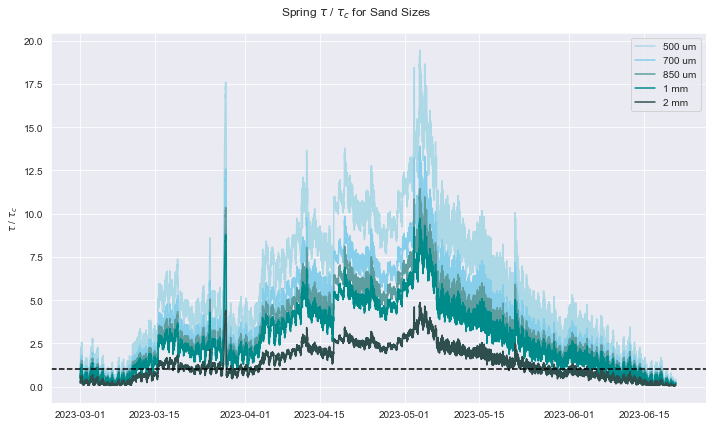

In [11]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

#plt.plot(spring['200'], color='powderblue', label='200 um')
plt.plot(spring['500'], color='lightblue', label='500 um')
plt.plot(spring['700'], color='skyblue', label='700 um')
plt.plot(spring['850'], color='cadetblue', label='850 um')
plt.plot(spring['1000'], color='darkcyan', label='1 mm')
plt.plot(spring['2000'], color='darkslategray', label='2 mm')

plt.axhline(y=1, color='k', linestyle='--')

plt.ylabel(r'$\tau$ / $\tau_c$')
plt.xlabel('')
plt.legend()
plt.suptitle(r'Spring $\tau$ / $\tau_c$ for Sand Sizes')
plt.tight_layout()
plt.show()

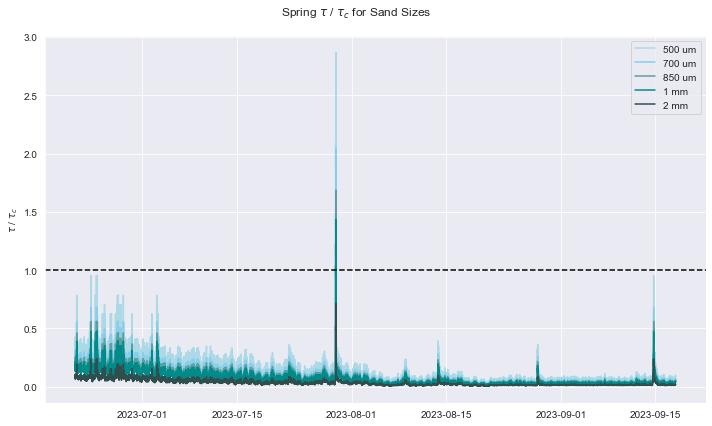

In [12]:
# plot for sping u*/ws values (settling velocities) for all sizes
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

#plt.plot(spring['200'], color='powderblue', label='200 um')
plt.plot(summer['500'], color='lightblue', label='500 um')
plt.plot(summer['700'], color='skyblue', label='700 um')
plt.plot(summer['850'], color='cadetblue', label='850 um')
plt.plot(summer['1000'], color='darkcyan', label='1 mm')
plt.plot(summer['2000'], color='darkslategray', label='2 mm')

plt.axhline(y=1, color='k', linestyle='--')

plt.ylabel(r'$\tau$ / $\tau_c$')
plt.xlabel('')
plt.legend()
plt.suptitle(r'Spring $\tau$ / $\tau_c$ for Sand Sizes')
plt.tight_layout()
plt.show()

##### Time Calculations

In [13]:
# import u*/ws time series for suspension threshold
ustarws_spring = pd.read_csv('../shear_velocity/ustar_ws/spring_ustar_ws.csv', index_col=0, parse_dates=True)
ustarws_summer = pd.read_csv('../shear_velocity/ustar_ws/summer_ustar_ws.csv', index_col=0, parse_dates=True)

# adjusting index dates
ustarws_spring = ustarws_spring[(ustarws_spring.index >= '2023-03-01') & (ustarws_spring.index <= '2023-06-21')]
ustarws_summer = ustarws_summer[(ustarws_summer.index >= '2023-06-22') & (ustarws_summer.index <= '2023-09-17')]
summer = summer[(summer.index >= '2023-06-22') & (summer.index <= '2023-09-17')]


Spring

In [15]:
# calculate the total time where tau/tauc > 1 AND shear velocity < 3.33 for each grain size in spring
lower_threshold = 1  # for tau/tauc ratio
upper_threshold = 3.33  # for shear velocity

# get grain sizes that exist in both dataframes
tau_grain_sizes = [col for col in spring.columns if col not in ['tau_m', 'tau_m*']]
shearvel_grain_sizes = [col for col in ustarws_spring.columns if col not in ['u*', '0.5', '1', '5']]

# find matching grain sizes between the two dataframes
matching_grain_sizes = [size for size in tau_grain_sizes if size in shearvel_grain_sizes]

print(f"Found {len(matching_grain_sizes)} matching grain sizes between dataframes:")
print(matching_grain_sizes)


Found 12 matching grain sizes between dataframes:
['2', '20', '45', '63', '100', '200', '280', '500', '700', '850', '1000', '2000']


In [16]:
# calculate the time delta between rows (in hours)
timestep_hours = (spring.index[1] - spring.index[0]).total_seconds() / 3600  # convert to hours

# create combined condition: tau/tauc > lower_threshold AND shear_velocity < upper_threshold
combined_condition = pd.DataFrame(index=spring.index)
for size in matching_grain_sizes:
    # both conditions must be true for bedload transport
    condition_lower = spring[size] > lower_threshold  # tau/tauc > 1
    condition_upper = ustarws_spring[size] < upper_threshold  # shear velocity < 3.33
    combined_condition[size] = condition_lower & condition_upper

# count the number of time steps where both conditions are met
bedload_counts_combined = combined_condition.sum()
bedload_hours_combined = bedload_counts_combined * timestep_hours

# save as DataFrame
bedload_spring_times = pd.DataFrame({
    'size': [float(size) for size in matching_grain_sizes],
    'time': bedload_hours_combined.values
})

print("\nBedload transport times (hours) with both thresholds:")
print(bedload_spring_times)


Bedload transport times (hours) with both thresholds:
      size     time
0      2.0     0.00
1     20.0     0.00
2     45.0     0.00
3     63.0     0.00
4    100.0     0.00
5    200.0    64.75
6    280.0   191.75
7    500.0  1267.50
8    700.0  2193.75
9    850.0  2211.25
10  1000.0  2149.25
11  2000.0  1604.50


Summer

In [17]:
# get grain sizes that exist in both dataframes
tau_grain_sizes = [col for col in summer.columns if col not in ['tau_m', 'tau_m*']]
shearvel_grain_sizes = [col for col in ustarws_summer.columns if col not in ['u*', '0.5', '1', '5']]

# find matching grain sizes between the two dataframes
matching_grain_sizes = [size for size in tau_grain_sizes if size in shearvel_grain_sizes]

print(f"Found {len(matching_grain_sizes)} matching grain sizes between dataframes:")
print(matching_grain_sizes)


Found 12 matching grain sizes between dataframes:
['2', '20', '45', '63', '100', '200', '280', '500', '700', '850', '1000', '2000']


In [18]:
# calculate the time delta between rows (in hours)
timestep_hours = (summer.index[1] - summer.index[0]).total_seconds() / 3600  # convert to hours

# create combined condition: tau/tauc > lower_threshold AND shear_velocity < upper_threshold
combined_condition = pd.DataFrame(index=summer.index)
for size in matching_grain_sizes:
    # both conditions must be true for bedload transport
    condition_lower = summer[size] > lower_threshold  # tau/tauc > 1
    condition_upper = ustarws_summer[size] < upper_threshold  # shear velocity < 3.33
    combined_condition[size] = condition_lower & condition_upper

# count the number of time steps where both conditions are met
bedload_counts_combined = combined_condition.sum()
bedload_hours_combined = bedload_counts_combined * timestep_hours

# save as DataFrame
bedload_summer_times = pd.DataFrame({
    'size': [float(size) for size in matching_grain_sizes],
    'time': bedload_hours_combined.values
})

print("\nBedload transport times (hours) with both thresholds:")
print(bedload_summer_times)


Bedload transport times (hours) with both thresholds:
      size   time
0      2.0   0.00
1     20.0   0.00
2     45.0   0.00
3     63.0   0.00
4    100.0   0.00
5    200.0  36.75
6    280.0   9.00
7    500.0   1.50
8    700.0   1.25
9    850.0   1.00
10  1000.0   0.75
11  2000.0   0.00


Bedload time plot

In [19]:
# classify the data by grain size class
def classify_grain(size):
    if size >= 850:
        return 'Coarse Sand'
    elif size >= 63:
        return 'Fine Sand'
    elif size >= 2:
        return 'Silt'
    else:
        return 'Clay'

bedload_spring_times['class'] = bedload_spring_times['size'].apply(classify_grain)
bedload_summer_times['class'] = bedload_summer_times['size'].apply(classify_grain)

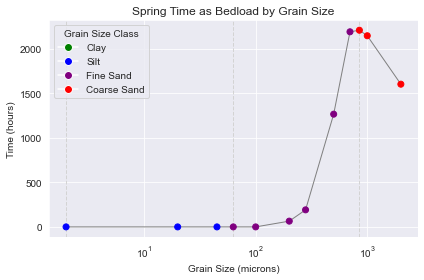

In [20]:
# BEDLOAD PLOT - spring
# color mapping for classes
class_colors = {
    'Clay': 'green',
    'Silt': 'blue',
    'Fine Sand': 'purple',
    'Coarse Sand': 'red'
}
# map colors to each point
colors = bedload_spring_times['class'].map(class_colors)

plt.figure(figsize=(6, 4))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot connecting line
# sort data by size for line connection
sorted_df = bedload_spring_times.sort_values('size')
plt.plot(
    sorted_df['size'],
    sorted_df['time'],
    color='gray',
    linestyle='-',
    linewidth=1,
    zorder=1
)

# scatter plot for suspended spring times
plt.scatter(
    bedload_spring_times['size'],
    bedload_spring_times['time'],
    c=colors,
    label=None
)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Spring Time as Bedload by Grain Size')
plt.xscale('log')
plt.tight_layout()

# custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Clay', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Silt', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Fine Sand', markerfacecolor='purple', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Coarse Sand', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title='Grain Size Class')

plt.show()

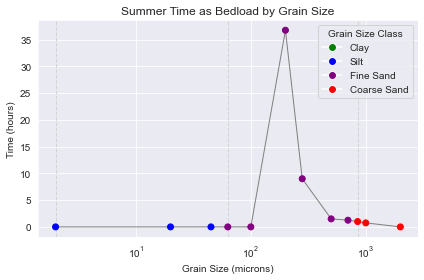

In [21]:
# BEDLOAD PLOT - summer
# color mapping for classes
class_colors = {
    'Clay': 'green',
    'Silt': 'blue',
    'Fine Sand': 'purple',
    'Coarse Sand': 'red'
}
# map colors to each point
colors = bedload_summer_times['class'].map(class_colors)

plt.figure(figsize=(6, 4))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot connecting line
# sort data by size for line connection
sorted_df = bedload_summer_times.sort_values('size')
plt.plot(
    sorted_df['size'],
    sorted_df['time'],
    color='gray',
    linestyle='-',
    linewidth=1,
    zorder=1
)

# scatter plot for suspended spring times
plt.scatter(
    bedload_summer_times['size'],
    bedload_summer_times['time'],
    c=colors,
    label=None
)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Summer Time as Bedload by Grain Size')
plt.xscale('log')
plt.tight_layout()

# custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Clay', markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Silt', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Fine Sand', markerfacecolor='purple', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Coarse Sand', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title='Grain Size Class')

plt.show()

Both seasons plot

In [22]:
# function to plot each season/class combination
def plot_season(df, season_label, color, markers):
    for grain_class, marker in markers.items():
        class_df = df[df['class'] == grain_class]
        # sort by size for line connection
        class_df = class_df.sort_values('size')
        # connect points for each class
        plt.plot(
            class_df['size'],
            class_df['time'],
            color=color,
            linestyle='-',
            linewidth=1,
            alpha=0.5,
            zorder=2
        )
        # scatter points
        plt.scatter(
            class_df['size'],
            class_df['time'],
            color=color,
            marker=marker,
            edgecolor='black',
            label=f"{season_label} - {grain_class}",
            s=60,
            zorder=3
        )

# function to plot each subplot
def subplot_season(ax, df, season_label, color, markers):
    for grain_class, marker in markers.items():
        class_df = df[df['class'] == grain_class].sort_values('size')
        # Connect points for each class
        ax.plot(
            class_df['size'],
            class_df['time'],
            color=color,
            linestyle='-',
            linewidth=1,
            alpha=0.5,
            zorder=2
        )
        # Scatter points with black edge
        ax.scatter(
            class_df['size'],
            class_df['time'],
            color=color,
            marker=marker,
            s=60,
            edgecolor='black',
            linewidth=1,
            zorder=3
        )

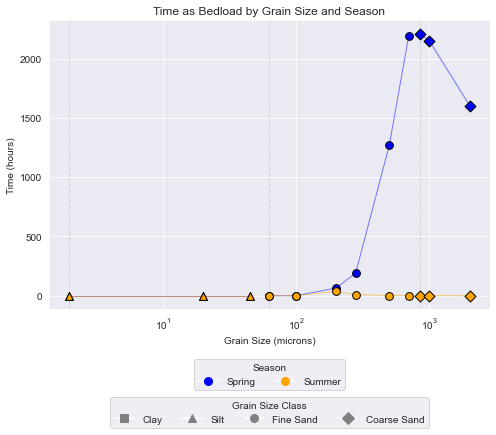

In [23]:
# BEDLOAD PLOT
# color and marker mapping
season_colors = {'Spring': 'blue', 'Summer': 'orange'}
markers = { 'Clay': 's', 'Silt': '^', 'Fine Sand': 'o', 'Coarse Sand': 'D'}

plt.figure(figsize=(7, 5))

# add vertical dashed lines for class boundaries
for boundary in [2, 63, 850]:
    plt.axvline(x=boundary, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# plot spring data
plot_season(bedload_spring_times, 'Spring', season_colors['Spring'], markers)
# plot summer data
plot_season(bedload_summer_times, 'Summer', season_colors['Summer'], markers)

plt.xlabel('Grain Size (microns)')
plt.ylabel('Time (hours)')
plt.title('Time as Bedload by Grain Size and Season')
plt.xscale('log')
plt.tight_layout()

# legend for season
season_legend = [
    Line2D([0], [0], marker='o', color='w', label=season,
            markerfacecolor=color, markeredgecolor=color, markersize=8)
    for season, color in season_colors.items()]
# legend for grain size classes (shapes)
class_legend = [
    Line2D([0], [0], marker=marker, color='w', label=grain_class,
            markerfacecolor='gray', markeredgecolor='gray', markersize=8,)
    for grain_class, marker in markers.items()]
# place legends at the bottom
first_legend = plt.legend(handles=season_legend, title='Season', loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=len(season_legend))
second_legend = plt.legend(handles=class_legend, title='Grain Size Class', loc='lower center', bbox_to_anchor=(0.5, -0.43), ncol=len(class_legend))
plt.gca().add_artist(first_legend)

plt.show()

Time Series Plot

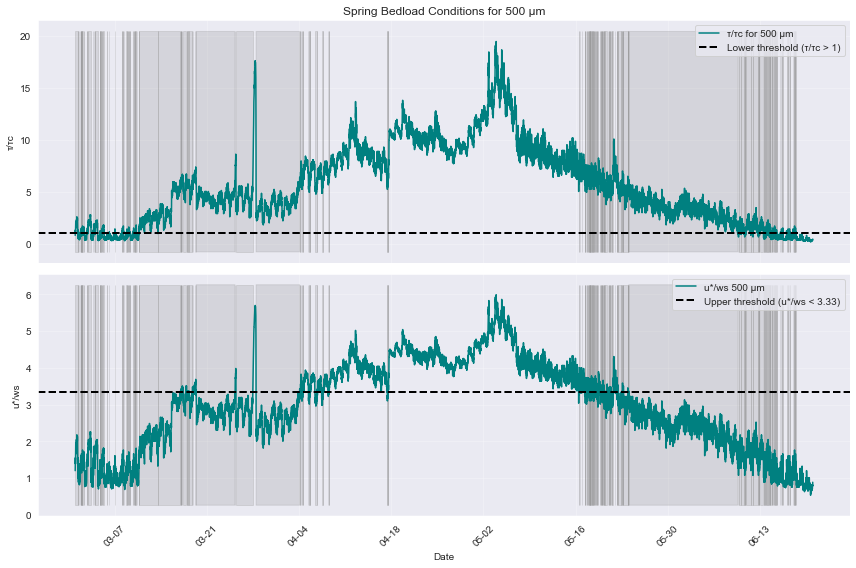


Statistics for 500 μm grain size:
Times when τ/τc > 1: 9543
Times when u*/ws < 3.33: 6280
Times when both conditions met: 5070
Percentage of time both conditions met: 47.15%


In [24]:
# Choose a representative grain size that exists in both dataframes
test_size = '500'  # or whichever size you want to examine

if test_size in spring.columns and test_size in ustarws_spring.columns:
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Top plot: tau/tauc values with threshold line
    ax1.plot(spring.index, spring[test_size], color='teal', label=f'τ/τc for {test_size} μm')
    ax1.axhline(y=1, color='black', linestyle='--', linewidth=2, label='Lower threshold (τ/τc > 1)')
    ax1.set_ylabel('τ/τc')
    ax1.set_title(f'Spring Bedload Conditions for {test_size} μm')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Bottom plot: shear velocity values with threshold line
    ax2.plot(spring.index, ustarws_spring[test_size], color='teal', label=f'u*/ws {test_size} μm')
    ax2.axhline(y=3.33, color='black', linestyle='--', linewidth=2, label='Upper threshold (u*/ws < 3.33)')
    ax2.set_ylabel('u*/ws')
    ax2.set_xlabel('Date')

    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Format x-axis dates
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.xticks(rotation=45)
    
    # Highlight periods where both conditions are met
    both_conditions = (spring[test_size] > 1) & (ustarws_spring[test_size] < 3.33)
    if both_conditions.any():
        # Add shaded regions where both conditions are true
        ax1.fill_between(spring.index, ax1.get_ylim()[0], ax1.get_ylim()[1], 
                        where=both_conditions, alpha=0.2, color='gray', 
                        label='Both conditions met')
        ax2.fill_between(spring.index, ax2.get_ylim()[0], ax2.get_ylim()[1], 
                        where=both_conditions, alpha=0.2, color='gray')
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    condition1_count = (spring[test_size] > 1).sum()
    condition2_count = (ustarws_spring[test_size] < 3.33).sum()
    both_count = both_conditions.sum()
    
    print(f"\nStatistics for {test_size} μm grain size:")
    print(f"Times when τ/τc > 1: {condition1_count}")
    print(f"Times when u*/ws < 3.33: {condition2_count}")
    print(f"Times when both conditions met: {both_count}")
    print(f"Percentage of time both conditions met: {both_count/len(spring)*100:.2f}%")
    
else:
    print(f"Size {test_size} not found in both dataframes")
    print(f"Available sizes in spring: {[col for col in spring.columns if col not in ['tau_m', 'tau_m*']]}")
    print(f"Available sizes in ustarws_spring: {[col for col in ustarws_spring.columns if col not in ['u*', '0.5', '1', '5']]}")

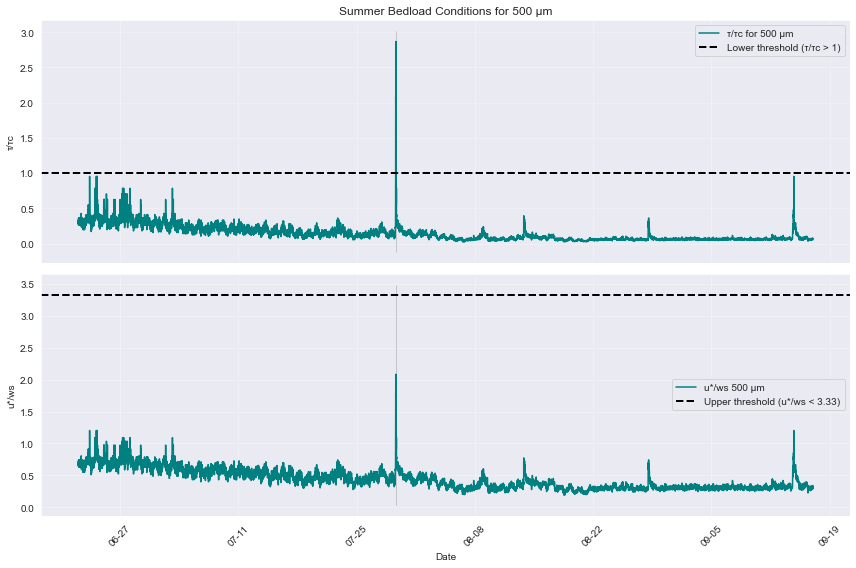


Statistics for 500 μm grain size:
Times when τ/τc > 1: 6
Times when u*/ws < 3.33: 8353
Times when both conditions met: 6
Percentage of time both conditions met: 0.06%


In [25]:
# Choose a representative grain size that exists in both dataframes
test_size = '500'  # or whichever size you want to examine

if test_size in summer.columns and test_size in ustarws_summer.columns:
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Top plot: tau/tauc values with threshold line
    ax1.plot(summer.index, summer[test_size], color='teal', label=f'τ/τc for {test_size} μm')
    ax1.axhline(y=1, color='black', linestyle='--', linewidth=2, label='Lower threshold (τ/τc > 1)')
    ax1.set_ylabel('τ/τc')
    ax1.set_title(f'Summer Bedload Conditions for {test_size} μm')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Bottom plot: shear velocity values with threshold line
    ax2.plot(summer.index, ustarws_summer[test_size], color='teal', label=f'u*/ws {test_size} μm')
    ax2.axhline(y=3.33, color='black', linestyle='--', linewidth=2, label='Upper threshold (u*/ws < 3.33)')
    ax2.set_ylabel('u*/ws')
    ax2.set_xlabel('Date')

    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Format x-axis dates
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.xticks(rotation=45)
    
    # Highlight periods where both conditions are met
    both_conditions = (summer[test_size] > 1) & (ustarws_summer[test_size] < 3.33)
    if both_conditions.any():
        # Add shaded regions where both conditions are true
        ax1.fill_between(summer.index, ax1.get_ylim()[0], ax1.get_ylim()[1], 
                        where=both_conditions, alpha=0.2, color='gray', 
                        label='Both conditions met')
        ax2.fill_between(summer.index, ax2.get_ylim()[0], ax2.get_ylim()[1], 
                        where=both_conditions, alpha=0.2, color='gray')
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    condition1_count = (summer[test_size] > 1).sum()
    condition2_count = (ustarws_summer[test_size] < 3.33).sum()
    both_count = both_conditions.sum()
    
    print(f"\nStatistics for {test_size} μm grain size:")
    print(f"Times when τ/τc > 1: {condition1_count}")
    print(f"Times when u*/ws < 3.33: {condition2_count}")
    print(f"Times when both conditions met: {both_count}")
    print(f"Percentage of time both conditions met: {both_count/len(spring)*100:.2f}%")
    
else:
    print(f"Size {test_size} not found in both dataframes")
    print(f"Available sizes in spring: {[col for col in spring.columns if col not in ['tau_m', 'tau_m*']]}")
    print(f"Available sizes in ustarws_spring: {[col for col in ustarws_spring.columns if col not in ['u*', '0.5', '1', '5']]}")

### Export bedload times as csv

In [26]:
# export times as csv
bedload_spring_times.to_csv('bedload_times/bedload_spring_times.csv', index=False)
bedload_summer_times.to_csv('bedload_times/bedload_summer_times.csv', index=False)